## General GPyOPt new way of use

In [1]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Problem definition
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1.5,1.5)}]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

In [3]:
bo = GPyOpt.methods.BayesianOptimization(func.f,space, constrains, model_type='GP',acquisition_type ='EI',exact_feval = True)

In [6]:
# --- Stop conditions
max_time  = None 
max_iter  = 20
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance) 

*Optimization completed:


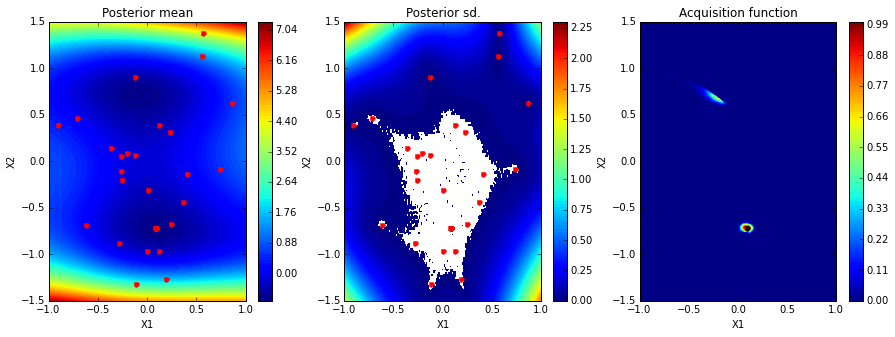

In [7]:
bo.plot_acquisition()

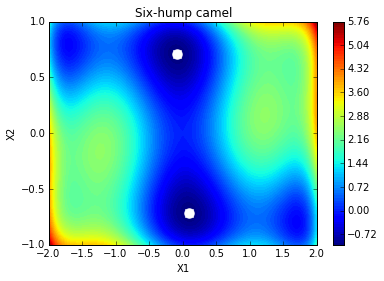

In [6]:
func.plot()

In [38]:
bo.model.model.optimize_restarts(2,verbose=False)